['MiniGrid-BlockedUnlockPickup-v0', 'MiniGrid-LavaCrossingS9N1-v0', 'MiniGrid-LavaCrossingS9N2-v0', 'MiniGrid-LavaCrossingS9N3-v0', 'MiniGrid-LavaCrossingS11N5-v0', 'MiniGrid-SimpleCrossingS9N1-v0', 'MiniGrid-SimpleCrossingS9N2-v0', 'MiniGrid-SimpleCrossingS9N3-v0', 'MiniGrid-SimpleCrossingS11N5-v0', 'MiniGrid-DistShift1-v0', 'MiniGrid-DistShift2-v0', 'MiniGrid-DoorKey-5x5-v0', 'MiniGrid-DoorKey-6x6-v0', 'MiniGrid-DoorKey-8x8-v0', 'MiniGrid-DoorKey-16x16-v0', 'MiniGrid-Dynamic-Obstacles-5x5-v0', 'MiniGrid-Dynamic-Obstacles-Random-5x5-v0', 'MiniGrid-Dynamic-Obstacles-6x6-v0', 'MiniGrid-Dynamic-Obstacles-Random-6x6-v0', 'MiniGrid-Dynamic-Obstacles-8x8-v0', 'MiniGrid-Dynamic-Obstacles-16x16-v0', 'MiniGrid-Empty-5x5-v0', 'MiniGrid-Empty-Random-5x5-v0', 'MiniGrid-Empty-6x6-v0', 'MiniGrid-Empty-Random-6x6-v0', 'MiniGrid-Empty-8x8-v0', 'MiniGrid-Empty-16x16-v0', 'MiniGrid-Fetch-5x5-N2-v0', 'MiniGrid-Fetch-6x6-N2-v0', 'MiniGrid-Fetch-8x8-N3-v0', 'MiniGrid-FourRooms-v0', 'MiniGrid-GoToDoor-5x5-

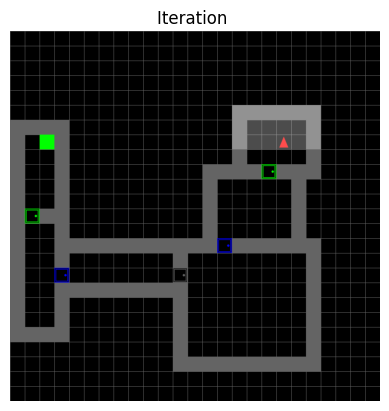


Knowledge Base: 
Room 0 is empty
Room 1:
  green door is at (17, 9) and is currently closed
Room 2:
  green goal is at (2, 7)
  green door is at (1, 12) and is currently closed
Room 3:
  green door is at (17, 9) and is currently closed
  blue door is at (14, 14) and is currently closed
Room 4:
  green door is at (1, 12) and is currently closed
  blue door is at (3, 16) and is currently closed
Room 5:
  blue door is at (3, 16) and is currently closed
  grey door is at (11, 16) and is currently closed
Room 6:
  blue door is at (14, 14) and is currently closed
  grey door is at (11, 16) and is currently closed

Connections:
Room 1 connect to Room 3 by green door at (17, 9) which is currently closed
Room 2 connect to Room 4 by green door at (1, 12) which is currently closed
Room 3 connect to Room 6 by blue door at (14, 14) which is currently closed
Room 4 connect to Room 5 by blue door at (3, 16) which is currently closed
Room 5 connect to Room 6 by grey door at (11, 16) which is currentl

In [ ]:
%reload_ext autoreload
%autoreload 2
import random
import gymnasium as gym
import minigrid
import matplotlib.pyplot as plt
from VLA2Systems.utils import (
    print_grid,
    render_env
)
from VLA2Systems.knowledge_base import KnowledgeBase
import imageio

def save_env_image(env, filename="env_image.png"):
    """Save the environment image to a file."""
    frame = env.render()
    imageio.imwrite(filename, frame)

# # List all available MiniGrid environments
env_list = [env_id for env_id in gym.envs.registry if "MiniGrid" in env_id]
print(env_list)
# Randomly select an environment
env_name = random.choice(env_list)
# print(f"Selected Environment: {env_name}")
# env_name = "BabyAI-ActionObjDoor-v0"
# env_name = "MiniGrid-DoorKey-16x16-v0"
# env_name = "BabyAI-BlockedUnlockPickup-v0"
# env_name = "BabyAI-FindObjS5-v0"
# env_name = "BabyAI-BossLevel-v0"
env_name = "MiniGrid-MultiRoom-N6-v0"
# env_name = "MiniGrid-MultiRoom-N4-S5-v0"

# seed = 69
seed = random.randint(1, 1000)
# seed = 232 # 152
print(f"seed is {seed}")
# Create the environment
env = gym.make(env_name, render_mode="rgb_array")

# Reset the environment to initialize it
env.reset(seed=seed)
# env.reset()
knowledge_base = KnowledgeBase(env)
# Print the grid
# print("\nGrid Map:")
# print_grid(knowledge_base.grid_data)
# Render the environment dynamically
fig, ax = plt.subplots()
render_env(env, ax, 2)
# Save the environment image
save_env_image(env, filename="env_image.png")

print(f"\nKnowledge Base: \n{knowledge_base}\n")
with open("./file.txt",'w') as file:
    file.write(str(knowledge_base))


In [27]:
# knowledge_base.KB['rooms'][0][-1]['state'] = 'open'
# knowledge_base.KB['rooms'][0][-1]['state'] = 'closed'
# knowledge_base.KB['rooms'][0][-1]['state'] = 'locked'
# knowledge_base.KB['connections'][0]
# print(knowledge_base.KB['connections'][0][2]['state'])

print(knowledge_base)

Room 0 is empty
Room 1:
  green door is at (17, 9) and is currently closed
Room 2:
  green goal is at (2, 7)
  green door is at (1, 12) and is currently closed
Room 3:
  green door is at (17, 9) and is currently closed
  blue door is at (14, 14) and is currently closed
Room 4:
  green door is at (1, 12) and is currently closed
  blue door is at (3, 16) and is currently closed
Room 5:
  blue door is at (3, 16) and is currently closed
  grey door is at (11, 16) and is currently closed
Room 6:
  blue door is at (14, 14) and is currently closed
  grey door is at (11, 16) and is currently closed

Connections:
Room 1 connect to Room 3 by green door at (17, 9) which is currently closed
Room 2 connect to Room 4 by green door at (1, 12) which is currently closed
Room 3 connect to Room 6 by blue door at (14, 14) which is currently closed
Room 4 connect to Room 5 by blue door at (3, 16) which is currently closed
Room 5 connect to Room 6 by grey door at (11, 16) which is currently closed


In [49]:
%reload_ext autoreload
%autoreload 2
from VLA2Systems.task_planning import RobotPlanner
print("Planner")
robot_position = env.unwrapped.agent_pos
robot_direction = env.unwrapped.agent_dir
start_location = int(robot_direction), tuple((int(robot_position[0]), int(robot_position[1])))
# start_location = 0, (1, 11)

print(f"start location is: {start_location}")

planner = RobotPlanner(knowledge_base, start_location=start_location, verbose=3)


Planner
start location is: (3, (18, 7))


In [50]:
# plan = planner.plan_go_to('red', 'door')
# plan = planner.plan_go_to('green', 'door')
# plan = planner.plan_go_to('yellow', 'key')
# plan = planner.plan_go_to('blue', 'box')
plan = planner.plan_go_to('green', 'goal')
# print(plan)
if plan:
    fig, ax = plt.subplots()
    render_env(env, ax, 2)
    print(planner)
else:
    print("No valid plan found.")

** hop, verbose=3: **
   state = robot_state
   tasks = [('go_to_object', 'goal', 'green', None)]
depth 0 tasks [('go_to_object', 'goal', 'green', None)]
depth 0 method instance ('go_to_object', 'goal', 'green', None)
ENTERED GOTO, LOCATION IS:  None  and obj location is:  (17, 9)
DID NOT FIND ANY OBJECT
FAILED DIRECTLY GOTO, gonna try with searching for the object
GOING IN search_rooms
is_infront_of_door:  False
ROBOT IS IN (18, 7) not infront of closed door, going to go to door green (17, 9) closed then open it
AFTER DOOR CONDITIONS door_tasks  [('go_to_object', 'door', 'green', (17, 9)), ('open', 'door', 'green')]
CHECK IF THE OBJECT WHICH dont have A LOCATION IS IN A ROOM
THE OBJECT WAS NOT FOUND IN THE neighbor room, doing recursion
is_infront_of_door:  False
ROBOT IS IN (18, 7) not infront of closed door, going to go to door blue (14, 14) closed then open it
AFTER DOOR CONDITIONS door_tasks  [('go_to_object', 'door', 'blue', (14, 14)), ('open', 'door', 'blue')]
CHECK IF THE OBJEC

In [ ]:
# plan = planner.plan_pick_up('yellow', 'key')
# if plan:
#     print(planner)
# else:
#     print("No valid plan found.")